In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Create Random DATA**

In [2]:
x=2*np.random.rand(100,1)
print(x.shape)
y=8+3*x+np.random.randn(100,1)
print(y)

(100, 1)
[[ 8.68369291]
 [11.96460423]
 [10.10976721]
 [14.35838927]
 [13.04291712]
 [ 8.16238194]
 [11.5382588 ]
 [12.82961905]
 [ 8.56821287]
 [11.79675665]
 [12.15288308]
 [12.43390453]
 [ 7.64460895]
 [ 9.24978772]
 [ 9.95021505]
 [ 9.22665014]
 [11.27732964]
 [11.64460309]
 [10.89511714]
 [ 9.17596373]
 [14.14809379]
 [10.34633103]
 [ 9.79342322]
 [ 9.56358646]
 [11.13882695]
 [ 8.84606678]
 [10.34984483]
 [ 8.24931285]
 [13.13490144]
 [13.82510948]
 [10.99307341]
 [12.57931566]
 [ 9.60898679]
 [13.64736721]
 [14.36970542]
 [ 7.77497846]
 [10.42451719]
 [ 9.85649412]
 [14.32893244]
 [12.3207412 ]
 [12.00712028]
 [ 9.67748956]
 [ 8.29122463]
 [12.6084199 ]
 [ 8.90013011]
 [13.46266515]
 [11.49491186]
 [11.2025689 ]
 [ 9.48096819]
 [11.25739738]
 [12.09488799]
 [13.57990227]
 [11.32333901]
 [10.15093869]
 [ 7.97762298]
 [13.30167921]
 [ 8.69073356]
 [ 9.95203473]
 [13.69057446]
 [13.7069696 ]
 [ 8.71904257]
 [ 9.03807621]
 [ 8.50828018]
 [ 8.98729832]
 [ 9.71609963]
 [11.12564854]
 

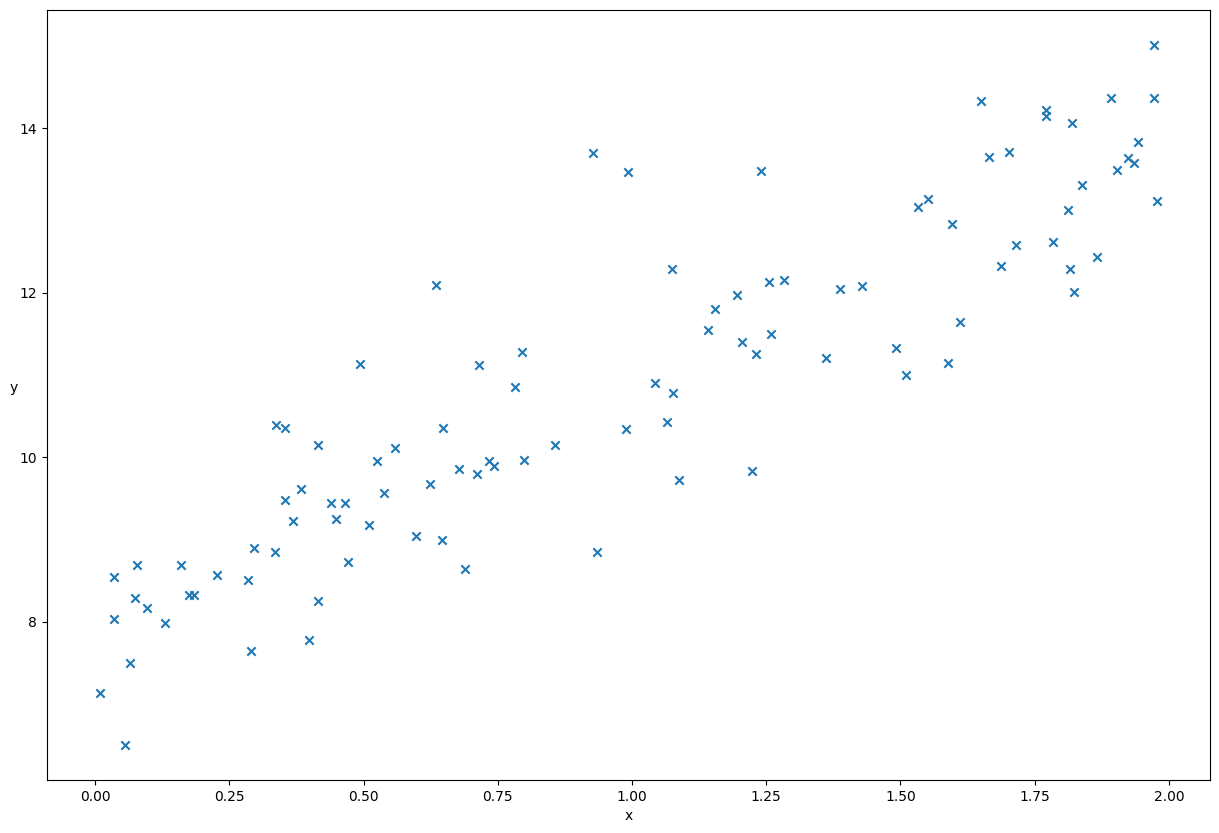

In [3]:
plt.figure(figsize=(15,10))
plt.scatter(x,y,marker='x')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.show()

In [5]:
# x=np.arange(6)
# print(x)
# x=x.reshape((6,1))
# print(x)
# x1=np.ones_like(x)
# print(x1)
# z=np.c_[x1,x]
# print(z)

In [4]:
#adding bias
B=np.ones_like(x)
x_b=np.c_[B,x]

theta=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print(theta)

[[7.98202978]
 [2.94835143]]


In [5]:
def cal_cost(theeta, x, y):
  m=len(y)
  predictions=x.dot(theeta)
  cost=(1/m)*np.sum(np.square(predictions-y))
  return cost

In [6]:
def grediant_decent(x,y,theeta,learning_rate,iterations):
  m=len(y)
  cost_history=np.zeros(iterations)
  theeta_history=np.zeros((iterations,2))

  for i in range(iterations):
    predictions=x.dot(theeta)
    cost_history[i]=cal_cost(theeta,x,y)
    grad=(2/m)*(x.T.dot(predictions-y))

    theeta=theeta-learning_rate*grad
    theeta_history[i,:]=theeta.T
  return theeta,cost_history,theeta_history

In [7]:
#calling functions
lr=0.3
n_iter=100

theeta=np.random.randn(2,1)
print("initial value of weights")
print(theeta)

x_b=np.c_[np.ones((len(x),1)),x]
theeta,cost_history,theeta_history=grediant_decent(x_b,y,theeta,lr,n_iter)
y_pred=np.dot(x_b,theeta)

print("optimal value of weights")
print('{:<10}{:.3f}'.format('b',theeta[0][0]))
print('{:<10}{:.3f}'.format('m',theeta[1][0]))
print('minimum value of cost function is ')
print('{:10}{:.3f}'.format('cost/MSE',cost_history[-1]))

predicted_actual=np.c_[y_pred,y]
print('comparing predicted vs actual path')
print(predicted_actual)

initial value of weights
[[-1.03517424]
 [ 1.06608112]]
optimal value of weights
b         7.982
m         2.948
minimum value of cost function is 
cost/MSE  0.818
comparing predicted vs actual path
[[ 8.21083276  8.68369291]
 [11.50536761 11.96460423]
 [ 9.62617493 10.10976721]
 [13.79741983 14.35838927]
 [12.50263701 13.04291712]
 [ 8.26878487  8.16238194]
 [11.34601423 11.5382588 ]
 [12.68649593 12.82961905]
 [ 8.65390605  8.56821287]
 [11.38677125 11.79675665]
 [11.76744402 12.15288308]
 [13.48551025 12.43390453]
 [ 8.83981262  7.64460895]
 [ 9.30374281  9.24978772]
 [10.14640317  9.95021505]
 [ 9.06834502  9.22665014]
 [10.32714741 11.27732964]
 [12.73359401 11.64460309]
 [11.05477859 10.89511714]
 [ 9.48452415  9.17596373]
 [13.20436605 14.14809379]
 [10.89776357 10.34633103]
 [10.07809506  9.79342322]
 [ 9.56925021  9.56358646]
 [12.66641914 11.13882695]
 [ 8.97243617  8.84606678]
 [ 9.89198098 10.34984483]
 [ 9.20543276  8.24931285]
 [12.5563071  13.13490144]
 [13.70929656 13.8

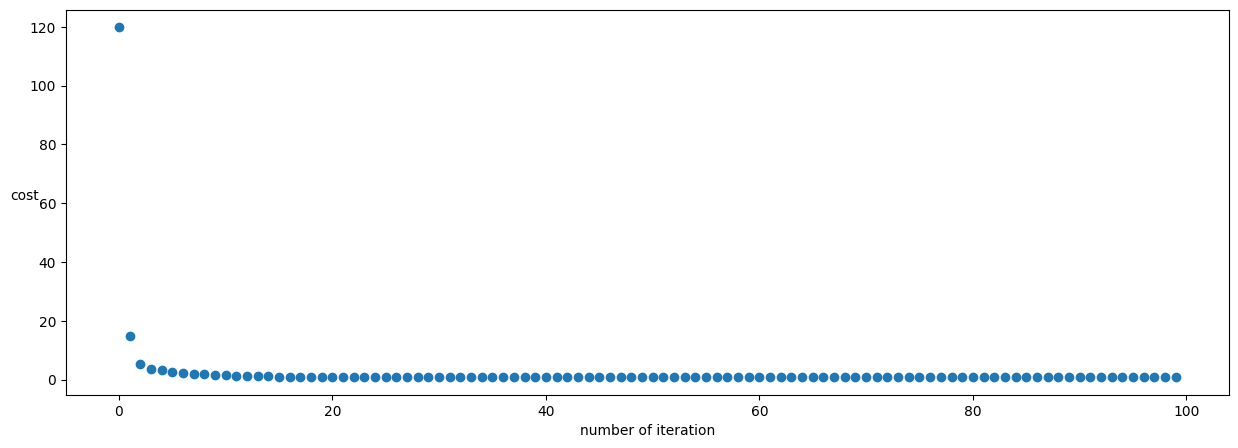

In [8]:
plt.figure(figsize=(15,5))
plt.scatter(range(n_iter),cost_history)
plt.xlabel("number of iteration") # Corrected the typo from xlable to xlabel
plt.ylabel("cost", rotation=0) # Corrected the typo from ylable to ylabel
plt.show()

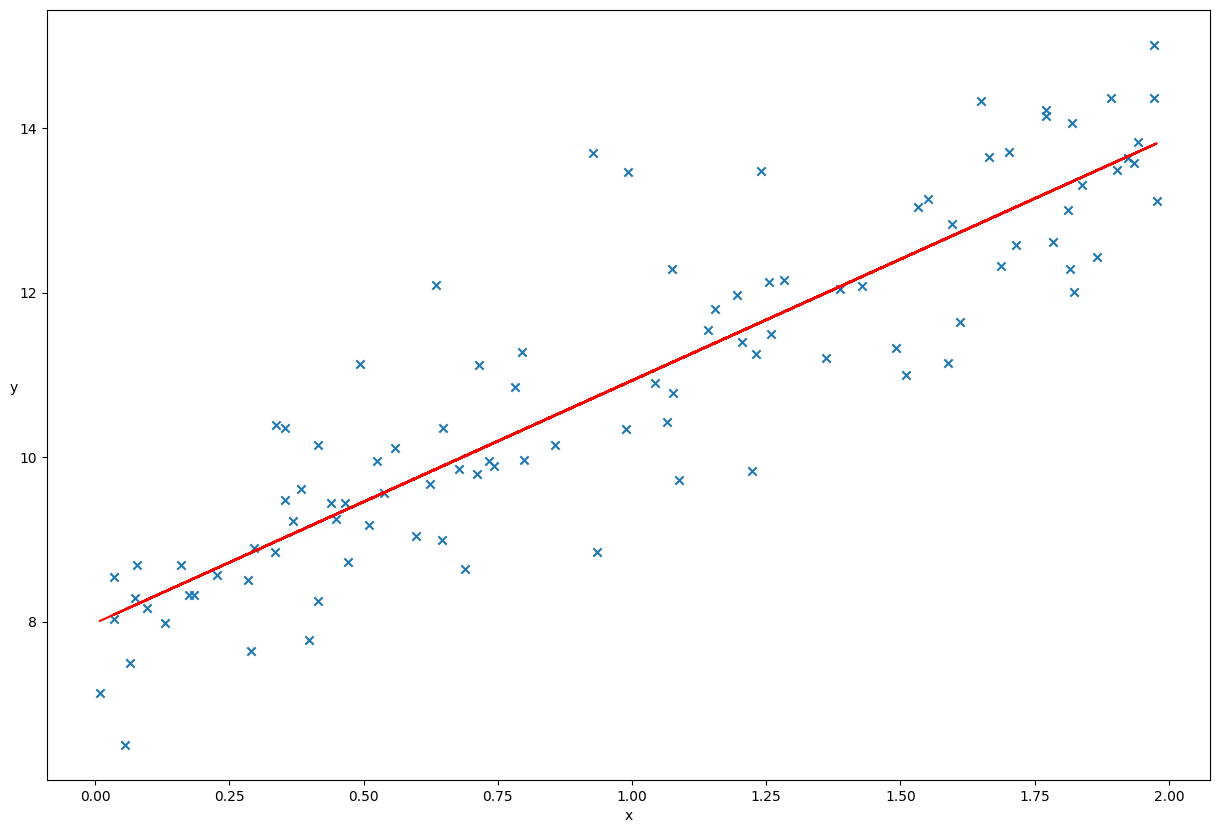

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(x,y,marker='x') # Changed 'scater' to 'scatter' and 'market' to 'marker'
plt.plot(x,y_pred,'red')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.show()

In [10]:
def stochastic_gradient_decent(x,y,theeta,learning_rate,iterations):
  m=len(y)
  cost_history=np.zeros(iterations)
  theeta_history=np.zeros((iterations,2))

  for i in range(iterations):
    cost_per_iteration=0
    #shuffel x and y
    for j in range(m):
      x_rand_index=np.random.randint(m)
      x_inner=x[x_rand_index].reshape(1, x.shape[1])
      y_inner=y[x_rand_index].reshape(1,1)

      predictions=np.dot(x_inner,theeta) #forword propogation
      cost_per_iteration+= cal_cost(theeta,x_inner,y_inner) #compute cost value
      grad=(2/m)*(x_inner.T.dot((predictions-y_inner))) #back propogation
      theeta=theeta-(learning_rate*grad)

    cost_history[i]=cost_per_iteration
  return theeta,cost_history,theeta_history

In [19]:
#calling functions
lr=0.3
n_iter=100

theeta=np.random.randn(2,1)
print("initial value of weights")
print(theeta)

x_b=np.c_[np.ones((len(x),1)),x]
theeta,cost_history,theeta_history=stochastic_gradient_decent(x_b,y,theeta,lr,n_iter)
y_pred=np.dot(x_b,theeta)

print("optimal value of weights")
print('{:<10}{:.3f}'.format('b',theeta[0][0]))
print('{:<10}{:.3f}'.format('m',theeta[1][0]))
print('minimum value of cost function is ')
print('{:10}{:.3f}'.format('cost/MSE',cost_history[-1]))

predicted_actual=np.c_[y_pred,y]
print('comparing predicted vs actual path')
print(predicted_actual)

initial value of weights
[[ 0.47568477]
 [-2.73159593]]
optimal value of weights
b         8.025
m         2.893
minimum value of cost function is 
cost/MSE  94.742
comparing predicted vs actual path
[[ 8.24967291  8.68369291]
 [11.48280526 11.96460423]
 [ 9.63863638 10.10976721]
 [13.73213893 14.35838927]
 [12.46148787 13.04291712]
 [ 8.30654493  8.16238194]
 [11.32642186 11.5382588 ]
 [12.64192008 12.82961905]
 [ 8.68448834  8.56821287]
 [11.36641926 11.79675665]
 [11.73999717 12.15288308]
 [13.42604263 12.43390453]
 [ 8.86693004  7.64460895]
 [ 9.32221365  9.24978772]
 [10.14916877  9.95021505]
 [ 9.09120313  9.22665014]
 [10.32654435 11.27732964]
 [12.68814036 11.64460309]
 [11.04061418 10.89511714]
 [ 9.49962564  9.17596373]
 [13.15013831 14.14809379]
 [10.88652556 10.34633103]
 [10.08213377  9.79342322]
 [ 9.58277261  9.56358646]
 [12.62221748 11.13882695]
 [ 8.99708179  8.84606678]
 [ 9.89948842 10.34984483]
 [ 9.22573587  8.24931285]
 [12.51415767 13.13490144]
 [13.64565808 13.

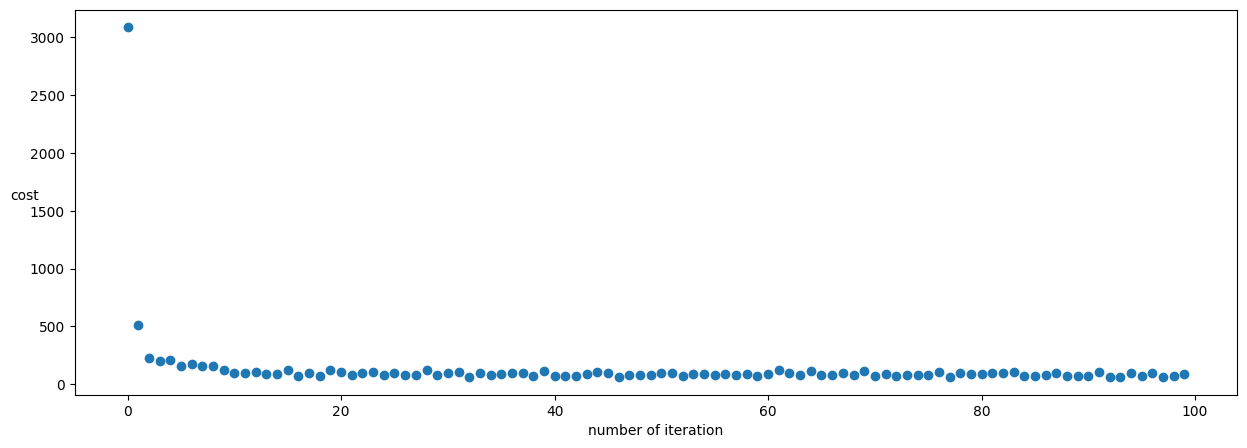

In [12]:
plt.figure(figsize=(15,5))
plt.scatter(range(n_iter),cost_history)
plt.xlabel("number of iteration") # Corrected the typo from xlable to xlabel
plt.ylabel("cost", rotation=0) # Corrected the typo from ylable to ylabel
plt.show()

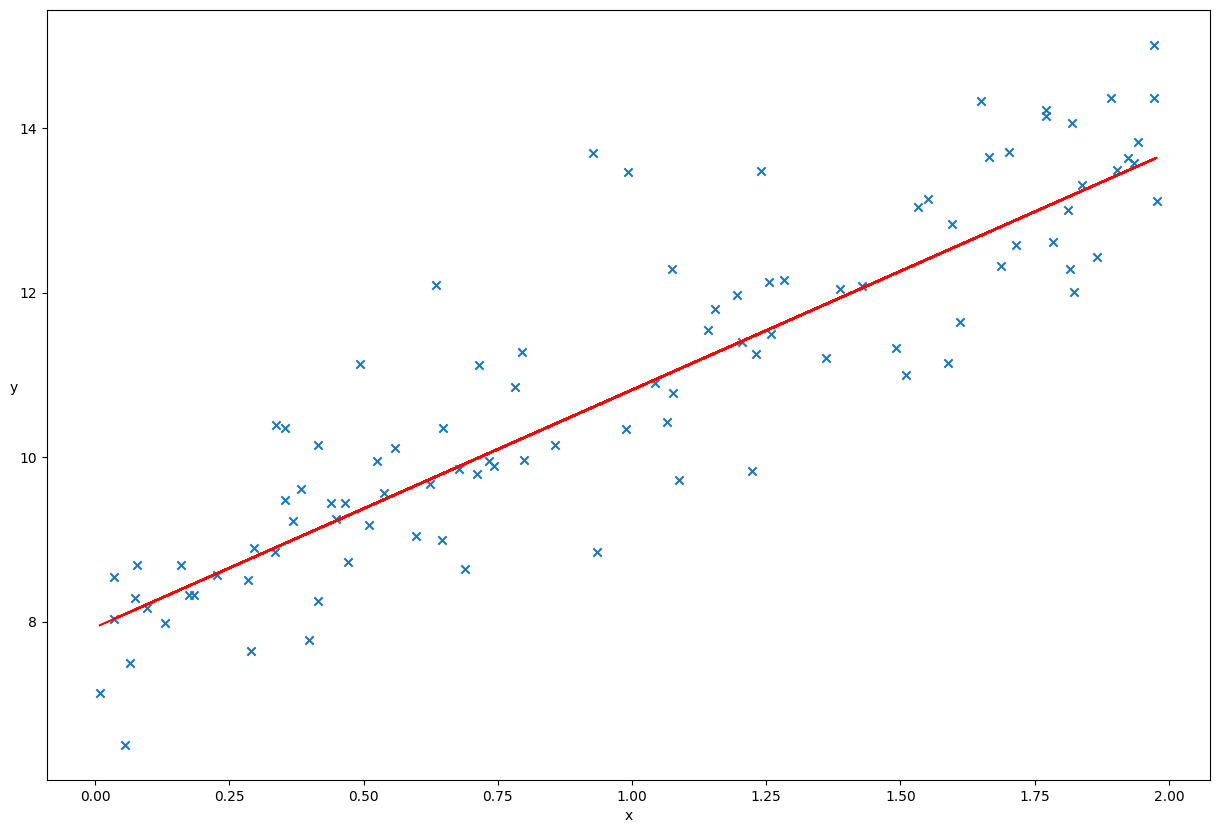

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(x,y,marker='x') # Changed 'scater' to 'scatter' and 'market' to 'marker'
plt.plot(x,y_pred,'red')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.show()

In [14]:
def mini_batch_gradient_decent(x, y, theeta, learning_rate, iterations):
  m = len(y)
  cost_history = np.zeros(iterations)
  theeta_history = np.zeros((iterations, 2))
  batch_size = 10

  for i in range(iterations):
    cost_per_iteration = 0
    # shuffel x and y
    rand_indicis = np.random.permutation(m)
    x = x[rand_indicis]
    y = y[rand_indicis]

    for j in range(0, m, batch_size):
      # Correct the indexing for x_inner and y_inner
      x_inner = x[j:j + batch_size]
      y_inner = y[j:j + batch_size]

      # Avoid division by zero if the batch is empty
      if len(y_inner) == 0:
        continue

      prediction = np.dot(x_inner, theeta)
      cost_per_iteration += cal_cost(theeta, x_inner, y_inner)
      grad = (2 / m) * (x_inner.T.dot((prediction - y_inner)))
      theeta = theeta - (learning_rate * grad)

    cost_history[i] = cost_per_iteration
  return theeta, cost_history, theeta_history

In [15]:
#calling functions
lr=0.3
n_iter=100

theeta=np.random.randn(2,1)
print("initial value of weights")
print(theeta)

x_b=np.c_[np.ones((len(x),1)),x]
theeta,cost_history,theeta_history=mini_batch_gradient_decent(x_b,y,theeta,lr,n_iter)
y_pred=np.dot(x_b,theeta)

print("optimal value of weights")
print('{:<10}{:.3f}'.format('b',theeta[0][0]))
print('{:<10}{:.3f}'.format('m',theeta[1][0]))
print('minimum value of cost function is ')
print('{:10}{:.3f}'.format('cost/MSE',cost_history[-1]))

predicted_actual=np.c_[y_pred,y]
print('comparing predicted vs actual path')
print(predicted_actual)

initial value of weights
[[-0.07880765]
 [-0.57099432]]
optimal value of weights
b         7.987
m         2.960
minimum value of cost function is 
cost/MSE  8.236
comparing predicted vs actual path
[[ 8.21677448  8.68369291]
 [11.52377489 11.96460423]
 [ 9.63747189 10.10976721]
 [13.82449956 14.35838927]
 [12.52481766 13.04291712]
 [ 8.27494586  8.16238194]
 [11.36381856 11.5382588 ]
 [12.70937225 12.82961905]
 [ 8.66152423  8.56821287]
 [11.40472979 11.79675665]
 [11.78684292 12.15288308]
 [13.51140981 12.43390453]
 [ 8.84813421  7.64460895]
 [ 9.31381978  9.24978772]
 [10.15966852  9.95021505]
 [ 9.07753131  9.22665014]
 [10.34109664 11.27732964]
 [12.75664853 11.64460309]
 [11.07148097 10.89511714]
 [ 9.49528514  9.17596373]
 [13.22920184 14.14809379]
 [10.91387185 10.34633103]
 [10.09110195  9.79342322]
 [ 9.58033178  9.56358646]
 [12.68921949 11.13882695]
 [ 8.98125957  8.84606678]
 [ 9.90428367 10.34984483]
 [ 9.21513775  8.24931285]
 [12.57869082 13.13490144]
 [13.73604286 13.8

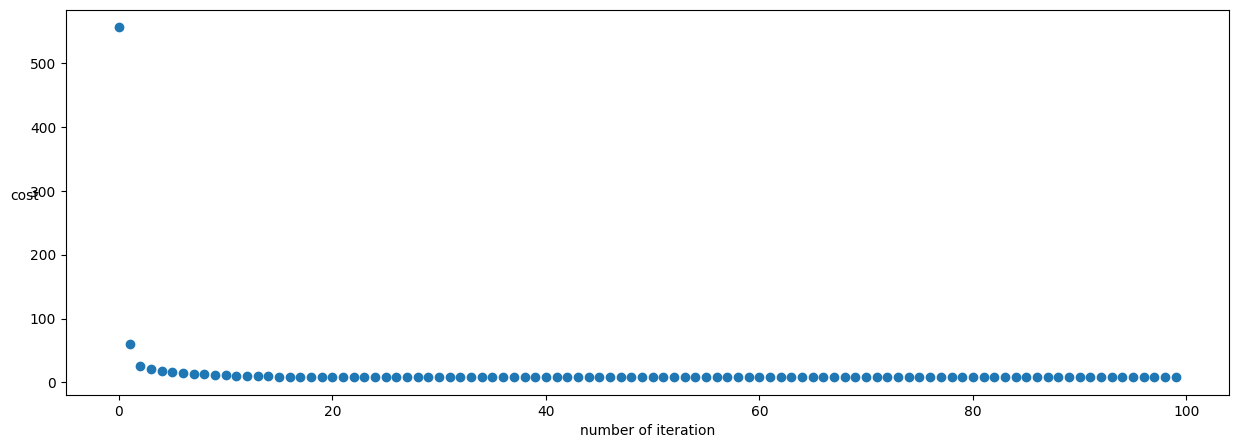

In [16]:
plt.figure(figsize=(15,5))
plt.scatter(range(n_iter),cost_history)
plt.xlabel("number of iteration") # Corrected the typo from xlable to xlabel
plt.ylabel("cost", rotation=0) # Corrected the typo from ylable to ylabel
plt.show()

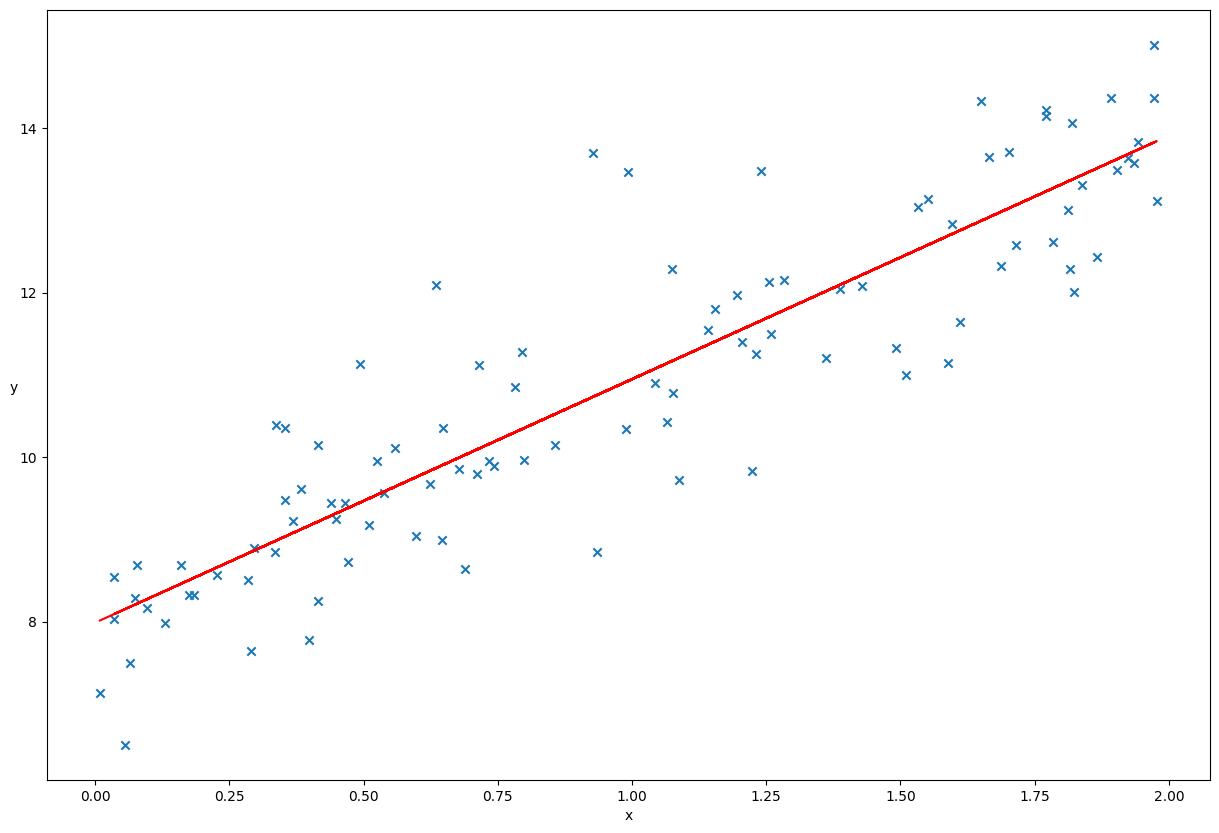

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(x,y,marker='x') # Changed 'scater' to 'scatter' and 'market' to 'marker'
plt.plot(x,y_pred,'red')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.show()